In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data=pd.read_csv('Summary of Weather.csv',header=0)
print(data.shape)

(119040, 31)


C:\Users\Lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Mencek data Precipt

In [4]:
data.Precip.value_counts()

0          64267
T          16753
0.254       3389
0.508       2909
0.762       2015
1.016       1639
1.27        1451
1.524       1233
2.032       1059
1.778        986
2.54         927
2.286        827
3.048        725
2.794        693
3.81         606
3.302        602
3.556        573
4.572        501
5.08         500
4.064        489
4.318        485
4.826        390
5.334        386
6.35         383
5.588        382
5.842        364
6.096        357
6.604        324
7.112        303
7.62         297
           ...  
91.44          1
111.252        1
105.918        1
234.95         1
203.708        1
72.39          1
167.386        1
92.202         1
123.952        1
102.362        1
126.492        1
116.586        1
101.854        1
147.828        1
120.904        1
139.446        1
98.552         1
99.06          1
149.352        1
110.998        1
123.698        1
165.1          1
206.248        1
211.328        1
238.76         1
90.424         1
182.372        1
163.322       

# Mengganti data T dengan 0

In [4]:
data["SNF"].replace({"T":"0"},inplace=True)
data["Snowfall"]=data["Snowfall"].replace("#VALUE!",np.nan)
data["Precip"].replace({"T":"0"},inplace=True)
data["PRCP"].replace({"T":"0"},inplace=True)

# Mengubah tipe data object-float

In [5]:
data['Precip'] = data['Precip'].astype(float)
data['Snowfall'] = data['Snowfall'].astype(float)
data['PRCP'] = data['PRCP'].astype(float)
data['SNF'] = data['SNF'].astype(float)
data['TSHDSBRSGF'] = pd.to_numeric(data['TSHDSBRSGF'], errors='coerce')
data['PoorWeather'] = pd.to_numeric(data['PoorWeather'], errors='coerce')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
STA            119040 non-null int64
Date           119040 non-null object
Precip         119040 non-null float64
WindGustSpd    532 non-null float64
MaxTemp        119040 non-null float64
MinTemp        119040 non-null float64
MeanTemp       119040 non-null float64
Snowfall       117833 non-null float64
PoorWeather    33553 non-null float64
YR             119040 non-null int64
MO             119040 non-null int64
DA             119040 non-null int64
PRCP           117108 non-null float64
DR             533 non-null float64
SPD            532 non-null float64
MAX            118566 non-null float64
MIN            118572 non-null float64
MEA            118542 non-null float64
SNF            117877 non-null float64
SND            5563 non-null float64
FT             0 non-null float64
FB             0 non-null float64
FTI            0 non-null float64
ITH            0 non-null fl

# Mengecek value pada TSHDSBRSGF dan PoorWeather

In [7]:
data.TSHDSBRSGF.value_counts()

1.000000e+00    31980
0.000000e+00      870
1.000000e+05      263
1.000000e+03       91
1.000010e+05       62
1.010000e+05       56
1.000001e+09       52
1.000001e+09       45
1.100000e+01       39
1.100000e+06       16
1.001000e+03       16
1.010010e+05       14
1.000101e+09       13
1.000101e+09        9
1.000000e+06        7
1.000000e+09        6
1.010001e+09        5
1.000100e+09        2
1.101000e+06        2
1.010001e+09        2
1.000100e+09        1
1.101001e+06        1
1.000100e+07        1
Name: TSHDSBRSGF, dtype: int64

In [9]:
data.PoorWeather.value_counts()

1.000000e+00    31980
0.000000e+00      870
1.000000e+05      263
1.000000e+03       91
1.000010e+05       62
1.010000e+05       56
1.000001e+09       52
1.000001e+09       45
1.100000e+01       39
1.100000e+06       16
1.001000e+03       16
1.010010e+05       14
1.000101e+09       13
1.000101e+09        9
1.000000e+06        7
1.000000e+09        6
1.010001e+09        5
1.000100e+09        2
1.101000e+06        2
1.010001e+09        2
1.000100e+09        1
1.101001e+06        1
1.000100e+07        1
Name: PoorWeather, dtype: int64

# Mengisi data null dengan mean

In [8]:
data['WindGustSpd'] = data['WindGustSpd'].fillna((data['WindGustSpd'].mean()))
data['PRCP'] = data['PRCP'].fillna((data['PRCP'].mean()))
data['DR'] = data['DR'].fillna((data['DR'].mean()))
data['SPD'] = data['SPD'].fillna((data['SPD'].mean()))
data['MIN'] = data['MIN'].fillna((data['MIN'].mean()))
data['MAX'] = data['MAX'].fillna((data['MAX'].mean()))
data['MEA'] = data['MEA'].fillna((data['MEA'].mean()))
data['SNF'] = data['SNF'].fillna((data['SNF'].mean()))
data['SND'] = data['SND'].fillna((data['SND'].mean()))
data['PGT'] = data['PGT'].fillna((data['PGT'].mean()))
data['Snowfall'] = data['Snowfall'].fillna((data['Snowfall'].mean()))
data['PoorWeather'] = data['PoorWeather'].fillna((data['PoorWeather'].mean()))
data['TSHDSBRSGF'] = data['TSHDSBRSGF'].fillna((data['TSHDSBRSGF'].mean()))

# Men-drop data yang tidak dipakai

In [9]:
data2=data.drop(['STA', 'PoorWeather','Date', 'SND', 'FB', 'ITH', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE', 'FT', 'FTI','MAX', 'MEA', 'MIN', 'SNF','PRCP','SPD'], axis=1)

In [10]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 12 columns):
Precip         119040 non-null float64
WindGustSpd    119040 non-null float64
MaxTemp        119040 non-null float64
MinTemp        119040 non-null float64
MeanTemp       119040 non-null float64
Snowfall       119040 non-null float64
YR             119040 non-null int64
MO             119040 non-null int64
DA             119040 non-null int64
DR             119040 non-null float64
PGT            119040 non-null float64
TSHDSBRSGF     119040 non-null float64
dtypes: float64(9), int64(3)
memory usage: 10.9 MB


# Mencari korelasi antar variabel

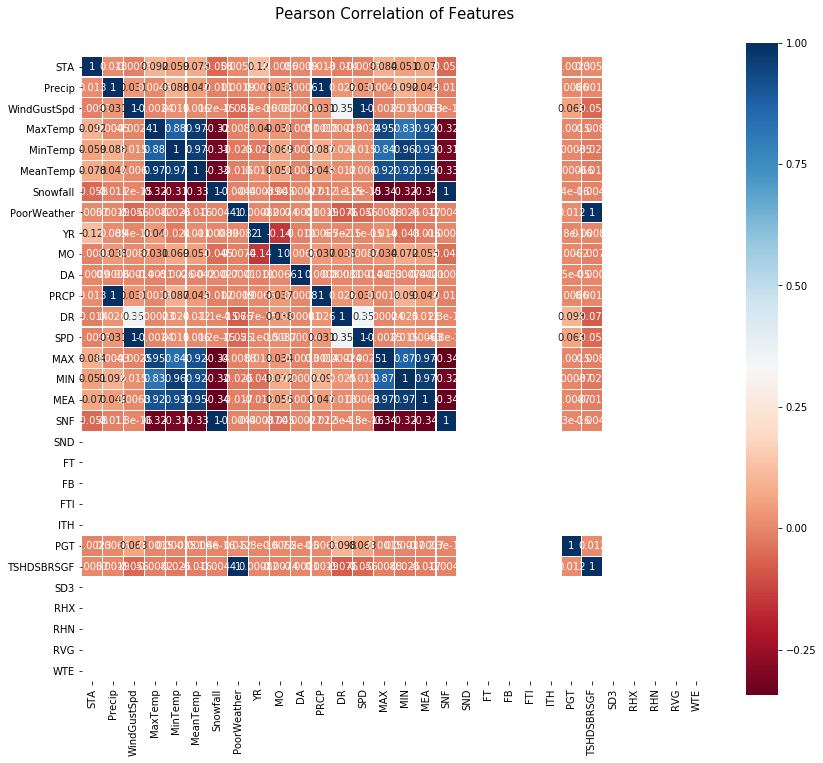

In [64]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

plt.savefig('corr_weather_data.png')

In [14]:
#Variabel yang berkorelasi adalah MaxTemp, MinTemp, MeanTemp, Snowfall, MO, DR, YR, WinGustSpd, dan TSHDSBRSGF

In [15]:
data3=data2.drop(['Precip','DA', 'PGT','YR','MO','DA','TSHDSBRSGF','DR','WindGustSpd' ],axis=1)

In [16]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 4 columns):
MaxTemp     119040 non-null float64
MinTemp     119040 non-null float64
MeanTemp    119040 non-null float64
Snowfall    119040 non-null float64
dtypes: float64(4)
memory usage: 3.6 MB


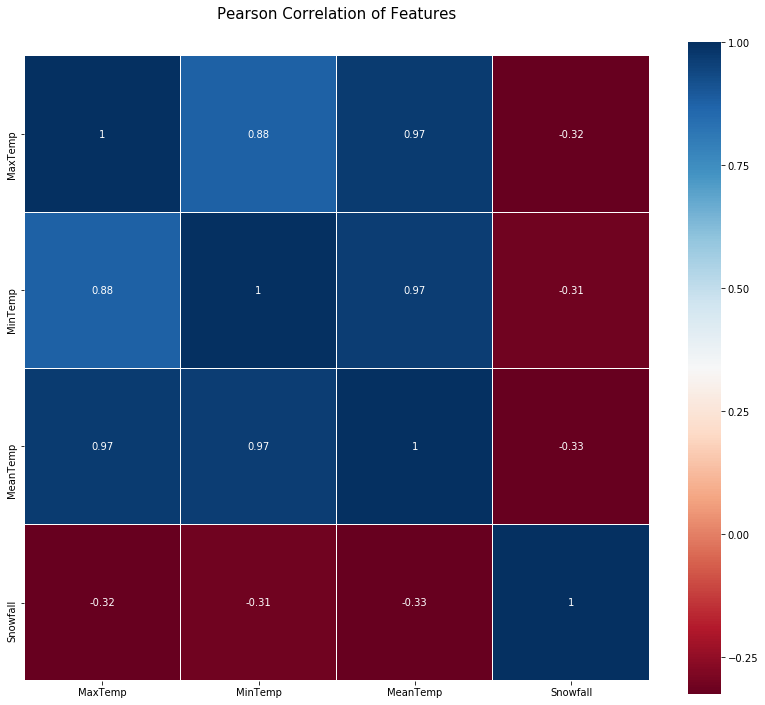

In [17]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data3.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

plt.savefig('corr_weather.png')

# Multi Dimension R-Square

In [19]:
train_data = data3.sample(frac=7/10, replace=False)
test_data = data3.sample(frac=3/10, replace=False)
y_train = train_data['Snowfall']
y_test=test_data['Snowfall']
X_train = train_data.drop(['Snowfall'], axis= 1)
X_train_tr=np.transpose(X_train)
X_test = test_data.drop(['Snowfall'], axis= 1)
print (y_train.shape)
print (y_test.shape)
print (X_train.shape)
print (X_test.shape)

(83328,)
(35712,)
(83328, 3)
(35712, 3)


In [61]:
w=np.linalg.solve(np.dot(X_train_tr,X_train), np.dot(X_train_tr,y_train))

In [62]:
Yhat=np.dot(X_train,w)
print (Yhat)

[ 0.14837538  0.60996855  1.13182112 ...  0.87218568  0.09202345
 -0.29014531]


In [63]:
d1=y_train-Yhat
d2=y_train-y_train.mean()
rsquared=1-d1.dot(d1)/d2.dot(d2)
print(rsquared)

0.019912543999355048


In [100]:
print(d1**2)

64227       0.022015
77315       0.372062
82582       1.281019
40133       0.855639
82965       0.163913
57730       0.027879
115646      0.489440
28400       0.025572
78896       0.678400
48873     150.517010
2433        0.115090
100315      0.000031
10975       0.115090
76897       0.012405
71395       0.003393
35618       0.239260
4285        0.029095
118906      0.328511
89875       0.012917
84843       0.013892
60894       0.171558
46144     611.651713
113638      0.007777
66461       1.651364
96816       0.075774
21726       0.107396
84323       0.014072
111442      0.150819
100966      0.102698
89999       0.000292
             ...    
28402       0.100522
94405       0.126429
39090       0.034787
114727      0.005336
66284       0.452673
16219       0.086803
87019       1.180344
5055        0.000428
95282       0.071898
63258       0.349948
33594       0.322105
99016       0.270038
33791       0.060466
105469      0.009855
89375       0.077992
62815       0.636498
69097       0

In [65]:
mse=np.mean(d1**2)

In [66]:
print(mse)

6.418538071372963


# Test

In [68]:
np.shape(y_test_mat)

(3,)

In [101]:
yhat_test=np.dot(X_test,w)

In [104]:
error=y_test-yhat_test

In [105]:
print(error**2)

16751      0.005420
72414      0.807476
31922      0.003371
76414      0.123317
75945      0.031729
53544      0.029030
67769      0.005934
56249      0.102577
95768      0.277623
56061      0.147360
82073      0.665894
21415      0.171558
64006      0.000093
31355      0.016892
61304      0.026675
75692      0.062083
25414      0.063795
103098     0.193300
117687     0.014709
57083      0.035784
30045      0.000428
116102     0.001513
103189     0.232039
15239      0.115090
73006      0.224858
53616      0.000003
75880      0.034504
59815      0.013003
2666       0.171558
41527      0.056503
            ...    
75835      0.281678
60314      0.060187
45106      0.382127
67922      0.133430
99510      0.228107
15592      0.139147
119014     0.001858
82897      0.050297
93323      0.571750
48277     35.176275
69384      0.277623
13090      0.177615
116392     0.056864
6093       0.025232
50861      0.150819
74035      0.314782
40689      0.069656
35118      0.088964
52240      0.007777


In [106]:
mse=np.mean(error**2)

In [107]:
print(mse)

8.147986168241397
